# Домашняя работа №1: Метод K-ближайших соседей (KNN)

**Цель:**  
1. Освоить работу алгоритма KNN для задач многоклассовой классификации и регрессии.  
2. Научиться рассчитывать и интерпретировать метрики качества.  


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)


## Задача 1. KNN для многоклассовой классификации

1 (1 балл). Выберите набор данных из датасетов sklean с несколькими классами (например, `Iris` или `Wine` – оба датасета импортированы в предыдущей ячейке).  
2 (1 балл). Разделите данные на обучающую и тестовую выборки.    
3 (1 балл). Обучите модель `KNeighborsClassifier`.  
4 (1 балл). Постройте confusion_matrix.

5 (1 балл). Посчитайте метрики оценки качества для задач классификации: accuracy, precision, recall, f1-score и сделайте выводы о качестве модели.  

In [68]:
from sklearn.metrics import f1_score, precision_score, recall_score


Iris = load_iris()
df = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df['target'] = Iris.target
print("-----Датасет:-----\n", df.head())

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=36)

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

y_result = model.predict(X_test)
matrix = confusion_matrix(y_test, y_result)
print(f"-----Матрица ошибок при n_neighbors=10:-----\n", matrix)

accuracy = np.trace(matrix) / np.sum(matrix)
recall = np.diag(matrix) / np.sum(matrix, axis=1)
precision = np.diag(matrix) / np.sum(matrix, axis=0)
f1 = 2 * precision * recall / (precision + recall)

print(f"-----Метрики (мои):-----")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-Score: {f1}")

# Либо можно посчитать с помощью sklearn, но меня смутило, что не все импорты были добавлены изначально))

accuracy_2 = accuracy_score(y_test, y_result)
recall_2 = recall_score(y_test, y_result, average=None)
precision_2 = precision_score(y_test, y_result, average=None)
f1_2 = f1_score(y_test, y_result, average=None)

print(f"-----Метрики (sklearn):-----")
print(f"Accuracy: {accuracy_2}")
print(f"Recall: {recall_2}")
print(f"Precision: {precision_2}")
print(f"F1-Score: {f1_2}")

-----Датасет:-----
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
-----Матрица ошибок при n_neighbors=10:-----
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
-----Метрики (мои):-----
Accuracy: 0.9666666666666667
Recall: [1.         0.90909091 1.        ]
Precision: [1.         1.         0.91666667]
F1-Score: [1.         0.95238095 0.95652174]
-----Метрики (sklearn):-----
Accuracy: 0.9666666666666667
Recall: [1.         0.90909091 1.        ]
Precision: [1.         1.         0.91666667]
F1-Score: [1.  

Модель хорошо классифицирует данные. Если поменять n_neighbours в конструкторе модели, то можно добиться идеального результата (всё будет угадано) на наших тестовых данных. Метрики также показывают высокие значения. На матрице ошибок тоже наглядно заметно, что самые большие значения находятся на главной диагонали. а то есть являются корректно отгаданными классами цветов в датасете.


## Задача 2. KNN для регрессии

1 (1 балл). Выберите набор данных из датасетов sklearn (например, `load_diabetes` – он импортирован в ячейке с импортами).  
2 (1 балл). Разделите данные на обучающую и тестовую выборки.  
3 (1 балл). Обучите модель `KNeighborsRegressor`.  
4 (1 балл). Посчитайте метрики оценки качества для задач регрессии: `MAE`, `RMSE` и `R²`, сделайте выводы о качестве модели.  
5 (1 балл). Визуализируйте реальные и предсказанные значения на графике.  

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10)), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59

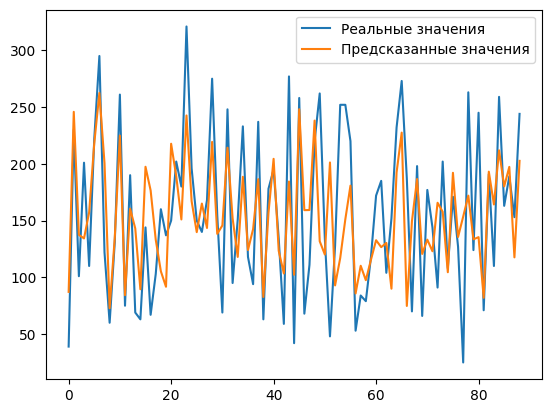

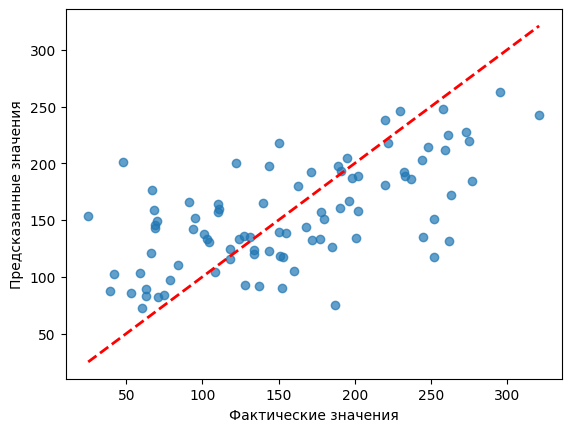

In [ ]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=36)

model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
y_result = model.predict(X_test)

mse = mean_squared_error(y_test, y_result)
mae = mean_absolute_error(y_test, y_result)
r2 = r2_score(y_test, y_result)

print("-----Метрики:-----")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

plt.plot(y_test, label='Реальные значения')
plt.plot(y_result, label='Предсказанные значения')
plt.legend()
plt.show()

plt.scatter(y_test, y_result, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.show()

Давайте попробуем проанализировать метрики качества модели. Посмотрим сначала на R2 ("насколько хорошо модель описывает изменения в наблюдаемых данных"), мы видим показатель всего 39%, показатели ниже 50% считаются слабыми. Большая величина MSE указывает на наличие значительных выбросов, где модель допускает достаточно большие ошибки. Можно было бы сделать два вывода: либо данные плохо подобраны и обработаны, либо модель KNN не очень подходит под конкретно эту проблему. Я склонна верить второму варианту :)


## Задача 3. Анализ влияния числа соседей

1 (1 балл). Изучите, как Accuracy (для классификации) или R² (для регрессии) зависит от k.  
2 (1 балл). Постройте график зависимости выбранной метрики от числа соседей.  
3 (1 балл). Сделайте вывод, как выбор k влияет на качество модели.


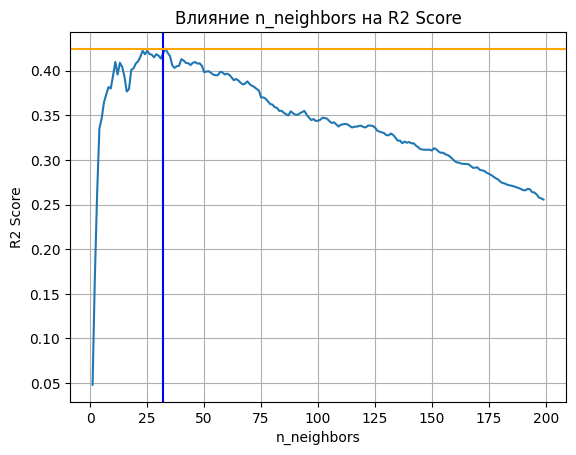

In [91]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=36)
sc = []

for k in range(1, 200):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_result = model.predict(X_test)
    r2 = r2_score(y_test, y_result)
    sc.append(r2)

plt.plot(range(1, 200), sc)
plt.xlabel('n_neighbors')
plt.ylabel('R2 Score')
plt.title('Влияние n_neighbors на R2 Score')
best_k_reg = np.argmax(sc)
best_r2 = max(sc)
plt.axvline(x=best_k_reg, color='blue')
plt.axhline(y=best_r2, color='orange')
plt.grid()
plt.show()

Из данного небольшого эксперимента можно сделать вывод, что количество соседей (гиперпараметр модели) нужно подбирать под конкретный датасет, поскольку слишком большое k (как видно по графику), может привести к переобучению модели и на тестовых данных модель уже не покажет такой хороший результат, и наоборот - слишком маленькое значение k не даёт модели корректно обучиться, из-за чего страдает результат (в нашем случае метрика r2) на тестовой выборке.